#Regression using neural networks
* Find the `pima-diabetes.csv` file in the `./data/` folder.
* Can we predict `Age` knowing all other variables?

In [1]:
from google.colab import files
uploaded = files.upload()
file_name = "heart.csv"

Saving heart.csv to heart.csv


In [2]:
import pandas as pd
data = pd.read_csv(file_name, delimiter=',')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
import numpy as np
dataset = np.genfromtxt(file_name, delimiter=",", skip_header = True) 

In [0]:
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

In [5]:
print('')
print(dataset.shape)
print('')
print(dataset[0:5])


(303, 14)

[[ 63.0  1.0  3.0  145.0  233.0  1.0  0.0  150.0  0.0  2.3  0.0  0.0  1.0
   1.0]
 [ 37.0  1.0  2.0  130.0  250.0  0.0  1.0  187.0  0.0  3.5  0.0  0.0  2.0
   1.0]
 [ 41.0  0.0  1.0  130.0  204.0  0.0  0.0  172.0  0.0  1.4  2.0  0.0  2.0
   1.0]
 [ 56.0  1.0  1.0  120.0  236.0  0.0  1.0  178.0  0.0  0.8  2.0  0.0  2.0
   1.0]
 [ 57.0  0.0  0.0  120.0  354.0  0.0  1.0  163.0  1.0  0.6  2.0  0.0  2.0
   1.0]]


In [0]:
# Shuffle
import random
np.random.shuffle(dataset)

In [23]:
# Index for 30%
index_30percent = int(0.3 * len(dataset[:, 0]))
print(index_30percent)

# Split into training and validation
XVALID = dataset[:index_30percent, [1,2,3,4,5,6,7,8,9,10,11,12,13]]
YVALID = dataset[:index_30percent, 0]

XTRAIN = dataset[index_30percent:, [1,2,3,4,5,6,7,8,9,10,11,12,13]]
YTRAIN = dataset[index_30percent:, 0]

90


In [0]:
# Standardization
mean = XTRAIN.mean(axis = 0)
XTRAIN -= mean
std = XTRAIN.std(axis = 0)
XTRAIN /= std

XVALID -= mean
XVALID /= std
# print(XTRAIN)

# Rescaling
Ymax = YTRAIN.max()
YTRAIN = YTRAIN / Ymax

YVALID /= Ymax
# print(YTRAIN)

## Build a neural network

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim = 13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

In [27]:
model.compile(loss='mse', optimizer = 'rmsprop', metrics=['mse'])
model.fit(XTRAIN, YTRAIN, epochs = 1024, batch_size=100, verbose = 0)

### Assess the predictions

In [34]:
np.set_printoptions(precision = 2)
print ('True Data:')
print(YTRAIN[:10])

prediction = model.predict(XVALID)
MSE = abs(YVALID - prediction)

print ('Prediction:')
print (prediction[:10].T)

print ('MSE:')
print(MSE.flatten())

True Data:
[0.78 0.74 0.45 0.74 0.6  0.65 0.79 0.61 0.83 0.7 ]
Prediction:
[[0.56 0.76 0.53 0.61 0.69 0.6  0.57 0.56 0.9  0.56]]
MSE:
[0.25 0.18 0.18 ... 0.05 0.13 0.05]


## Build a neural network (UNDERFIT)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelu = Sequential()
modelu.add(Dense(12, input_dim = 13, activation='relu'))
modelu.add(Dense(8, activation='relu'))
modelu.add(Dense(1, activation='linear'))

In [49]:
modelu.compile(loss='mse', optimizer = 'rmsprop', metrics=['mse'])
modelu.fit(XTRAIN, YTRAIN, epochs = 2, batch_size=100, verbose = 0)

### Assess the predictions (UNDERFIT)

In [50]:
np.set_printoptions(precision = 2)
print ('True Data:')
print(YTRAIN[:10])

prediction = modelu.predict(XVALID)
MSEU = abs(YVALID - prediction)

print ('Prediction:')
print (prediction[:10].T)

print ('MSEU:')
print(MSEU.flatten())

True Data:
[0.78 0.74 0.45 0.74 0.6  0.65 0.79 0.61 0.83 0.7 ]
Prediction:
[[0.64 0.33 0.27 0.06 0.28 0.02 0.28 0.21 0.   0.5 ]]
MSEU:
[0.16 0.27 0.1  ... 0.43 0.5  0.32]


## Build a neural network (OVERFIT)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential()
modelo.add(Dense(120, input_dim = 13, activation='relu'))
modelo.add(Dense(80, activation='relu'))
modelo.add(Dense(1, activation='linear'))

In [46]:
modelo.compile(loss='mse', optimizer = 'rmsprop', metrics=['mse'])
modelo.fit(XTRAIN, YTRAIN, epochs = 2048, batch_size=100, verbose = 0)

### Assess the predictions (OVERFIT)

In [47]:
np.set_printoptions(precision = 2)
print ('True Data:')
print(YTRAIN[:10])

prediction = modelo.predict(XVALID)
MSEO = abs(YVALID - prediction)

print ('Prediction:')
print (prediction[:10].T)

print ('MSEO:')
print(MSEO.flatten())

True Data:
[0.78 0.74 0.45 0.74 0.6  0.65 0.79 0.61 0.83 0.7 ]
Prediction:
[[0.83 0.59 0.66 0.65 0.81 0.68 0.65 0.79 0.73 0.55]]
MSEO:
[0.02 0.45 0.09 ... 0.08 0.15 0.03]


## Comparison Scenarios

In [58]:
print ('MSE:')
print(MSE[:10, 1].flatten())

print ('MSEU:')
print(MSEU[:10, 1].flatten())

print ('MSEO:')
print(MSEO[:10, 1].flatten())

MSE:
[0.18 0.38 0.15 0.24 0.31 0.23 0.19 0.18 0.53 0.19]
MSEU:
[0.27 0.04 0.11 0.32 0.1  0.35 0.1  0.17 0.37 0.13]
MSEO:
[0.45 0.22 0.29 0.27 0.43 0.3  0.27 0.42 0.36 0.17]


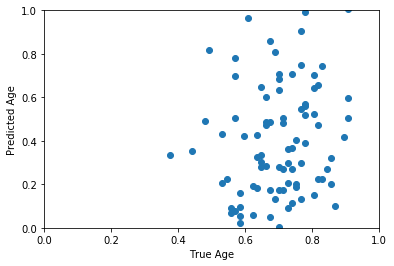

In [60]:
import matplotlib.pyplot as plt

plt.scatter(YVALID, prediction)
plt.ylabel('Predicted Age')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('True Age')
plt.show()